In [2]:
import pandas as pd

In [3]:
company_fundamentals = pd.read_csv("fundamentals.csv")
company_prices = pd.read_csv("prices.csv")
company_split_prices = pd.read_csv("prices-split-adjusted.csv")
company_info = pd.read_csv("securities.csv")

In [4]:
company_prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
company_fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


I will only be predicting Apple's (Ticker symbol: AAPL) closing stock price


In [7]:
apple_fund = company_fundamentals[company_fundamentals["Ticker Symbol"]== "AAPL"]

In [8]:
apple_prices = company_prices[company_prices["symbol"] == "AAPL"]

In [9]:
apple_fund.loc[:,"Period Ending"] = pd.to_datetime(apple_fund["Period Ending"])
apple_fund["Year"] = apple_fund["Period Ending"].dt.year
col_idx = apple_fund.columns.get_loc('Period Ending')
apple_fund.insert(col_idx + 1, 'Year', apple_fund.pop('Year'))

/var/folders/zy/k_z06qxx3j35qmc826ygwtx40000gn/T/ipykernel_16616/4227387805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_fund.loc[:,"Period Ending"] = pd.to_datetime(apple_fund["Period Ending"])
/var/folders/zy/k_z06qxx3j35qmc826ygwtx40000gn/T/ipykernel_16616/4227387805.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  apple_fund.loc[:,"Period Ending"] = pd.to_datetime(apple_fund["Period Ending"])
/var/folders/zy/k_z06qxx3j35qmc826ygwtx40000gn/T/ipykernel_16616/4227387805.py:2: SettingWithCopyWarning: 
A valu

In [10]:
apple_fund

,Unnamed: 0,Ticker Symbol,Period Ending,Year,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
8,8,AAPL,2013-09-28,2013,3.622300e+10,-1.949000e+09,1.156000e+09,30.0,-8.165000e+09,0.0,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013.0,40.03,9.252311e+08
9,9,AAPL,2014-09-27,2014,4.864900e+10,-6.452000e+09,9.800000e+08,35.0,-9.571000e+09,0.0,...,6.853100e+10,6.344800e+10,1.115470e+11,1.202920e+11,2.318390e+11,1.827950e+11,0.0,2014.0,6.49,6.087827e+09
10,10,AAPL,2015-09-26,2015,6.067100e+10,-3.124000e+09,1.285000e+09,45.0,-1.124700e+10,0.0,...,8.937800e+10,8.061000e+10,1.193550e+11,1.709900e+11,2.903450e+11,2.337150e+11,0.0,2015.0,9.28,5.753664e+09
11,11,AAPL,2016-09-24,2016,5.932100e+10,1.044000e+09,1.348000e+09,36.0,-1.273400e+10,0.0,...,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,2016.0,8.35,5.471497e+09


In [11]:
apple_prices["date"] = pd.to_datetime(apple_prices["date"])
apple_prices["year"] = apple_prices["date"].dt.year
idx = apple_prices.columns.get_loc("date")
apple_prices.insert(idx + 1, "year", apple_prices.pop("year"))

/var/folders/zy/k_z06qxx3j35qmc826ygwtx40000gn/T/ipykernel_16616/4243017447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_prices["date"] = pd.to_datetime(apple_prices["date"])
/var/folders/zy/k_z06qxx3j35qmc826ygwtx40000gn/T/ipykernel_16616/4243017447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_prices["year"] = apple_prices["date"].dt.year


In [12]:
apple_prices

,date,year,symbol,open,close,low,high,volume
254,2010-01-04,2010,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
721,2010-01-05,2010,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
1189,2010-01-06,2010,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
1657,2010-01-07,2010,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
2125,2010-01-08,2010,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0
...,...,...,...,...,...,...,...,...
848767,2016-12-23,2016,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
849267,2016-12-27,2016,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
849767,2016-12-28,2016,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0
850267,2016-12-29,2016,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0


In [13]:
apple_df = pd.merge(apple_prices, apple_fund, how='left', left_on=['symbol', 'year'], right_on=['Ticker Symbol', 'Year'])

In [14]:
apple_df = apple_df.drop(["Unnamed: 0", "Ticker Symbol", "Period Ending", "Year", "For Year"], axis=1)

Delete null entries from newly combined dataframe

In [16]:
apple_df = apple_df.dropna(axis= 0, how='any')

In [17]:
apple_df

,date,year,symbol,open,close,low,high,volume,Accounts Payable,Accounts Receivable,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
754,2013-01-02,2013,AAPL,553.819992,549.029976,541.630020,554.999992,140129500.0,3.622300e+10,-1.949000e+09,...,2.070000e+11,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08
755,2013-01-03,2013,AAPL,547.879990,542.099991,540.999992,549.669991,88241300.0,3.622300e+10,-1.949000e+09,...,2.070000e+11,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08
756,2013-01-04,2013,AAPL,536.969994,526.999992,525.829979,538.630005,148583400.0,3.622300e+10,-1.949000e+09,...,2.070000e+11,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08
757,2013-01-07,2013,AAPL,521.999985,523.900002,515.199989,529.300018,121039100.0,3.622300e+10,-1.949000e+09,...,2.070000e+11,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08
758,2013-01-08,2013,AAPL,529.209976,525.310020,521.250008,531.889984,114676800.0,3.622300e+10,-1.949000e+09,...,2.070000e+11,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2016-12-23,2016,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0,5.932100e+10,1.044000e+09,...,3.216860e+11,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09
1758,2016-12-27,2016,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0,5.932100e+10,1.044000e+09,...,3.216860e+11,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09
1759,2016-12-28,2016,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0,5.932100e+10,1.044000e+09,...,3.216860e+11,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09
1760,2016-12-29,2016,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0,5.932100e+10,1.044000e+09,...,3.216860e+11,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09


In [18]:
apple_corr = apple_df.corr()["close"].sort_values(ascending= False)

/var/folders/zy/k_z06qxx3j35qmc826ygwtx40000gn/T/ipykernel_16616/3460752305.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  apple_corr = apple_df.corr()["close"].sort_values(ascending= False)


 Simple Moving average:
 - Caluclated average price of the closing stock after a period starting from 30 days prior to date of the current row

In [20]:
apple_df["SMA_30"] = apple_df["close"].rolling(window=30).mean()

Evidently  the first 30 rows of the dataset are null due to the fact of the simple moving average being calculated every 30 days (rows), so I decided to replace these null values with the average value of the column. 

In [22]:
apple_df["SMA_30"].fillna(apple_df["SMA_30"].mean(), inplace= True)

In [23]:
apple_df

,date,year,symbol,open,close,low,high,volume,Accounts Payable,Accounts Receivable,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,SMA_30
754,2013-01-02,2013,AAPL,553.819992,549.029976,541.630020,554.999992,140129500.0,3.622300e+10,-1.949000e+09,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08,246.371188
755,2013-01-03,2013,AAPL,547.879990,542.099991,540.999992,549.669991,88241300.0,3.622300e+10,-1.949000e+09,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08,246.371188
756,2013-01-04,2013,AAPL,536.969994,526.999992,525.829979,538.630005,148583400.0,3.622300e+10,-1.949000e+09,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08,246.371188
757,2013-01-07,2013,AAPL,521.999985,523.900002,515.199989,529.300018,121039100.0,3.622300e+10,-1.949000e+09,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08,246.371188
758,2013-01-08,2013,AAPL,529.209976,525.310020,521.250008,531.889984,114676800.0,3.622300e+10,-1.949000e+09,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,40.03,9.252311e+08,246.371188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,2016-12-23,2016,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0,5.932100e+10,1.044000e+09,...,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09,112.194333
1758,2016-12-27,2016,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0,5.932100e+10,1.044000e+09,...,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09,112.488667
1759,2016-12-28,2016,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0,5.932100e+10,1.044000e+09,...,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09,112.857000
1760,2016-12-29,2016,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0,5.932100e+10,1.044000e+09,...,1.068690e+11,7.900600e+10,1.282490e+11,1.934370e+11,3.216860e+11,2.156390e+11,0.0,8.35,5.471497e+09,113.177667


In [24]:
apple_corr = apple_df.corr()["close"].sort_values(ascending= False)

/var/folders/zy/k_z06qxx3j35qmc826ygwtx40000gn/T/ipykernel_16616/3460752305.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  apple_corr = apple_df.corr()["close"].sort_values(ascending= False)


In [25]:
apple_corr[1:7]

low                           0.999926
high                          0.999924
open                          0.999808
SMA_30                        0.935197
Capital Expenditures          0.758679
Other Financing Activities    0.755413
Name: close, dtype: float64

Update dataframe to only contain the highest correlated values

In [27]:
apple_df = apple_df[["date", "year", "symbol", "open", "close", "low", "high", "SMA_30"]]

In [28]:
apple_df

,date,year,symbol,open,close,low,high,SMA_30
754,2013-01-02,2013,AAPL,553.819992,549.029976,541.630020,554.999992,246.371188
755,2013-01-03,2013,AAPL,547.879990,542.099991,540.999992,549.669991,246.371188
756,2013-01-04,2013,AAPL,536.969994,526.999992,525.829979,538.630005,246.371188
757,2013-01-07,2013,AAPL,521.999985,523.900002,515.199989,529.300018,246.371188
758,2013-01-08,2013,AAPL,529.209976,525.310020,521.250008,531.889984,246.371188
...,...,...,...,...,...,...,...,...
1757,2016-12-23,2016,AAPL,115.589996,116.519997,115.589996,116.519997,112.194333
1758,2016-12-27,2016,AAPL,116.519997,117.260002,116.489998,117.800003,112.488667
1759,2016-12-28,2016,AAPL,117.519997,116.760002,116.199997,118.019997,112.857000
1760,2016-12-29,2016,AAPL,116.449997,116.730003,116.400002,117.110001,113.177667


In [29]:
import seaborn as sns

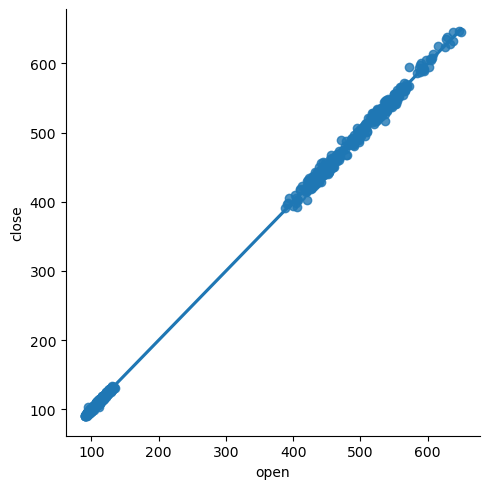

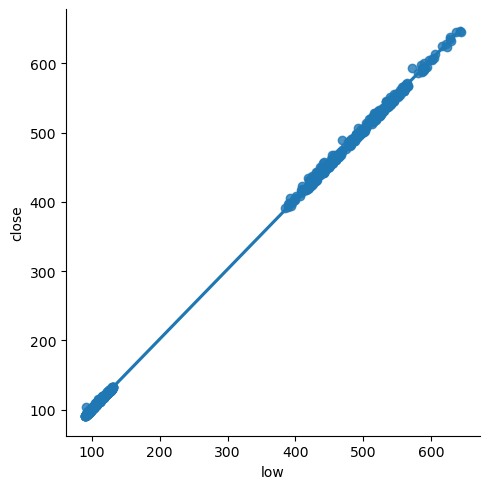

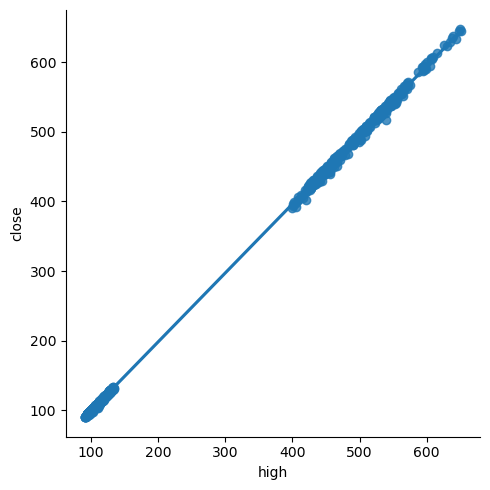

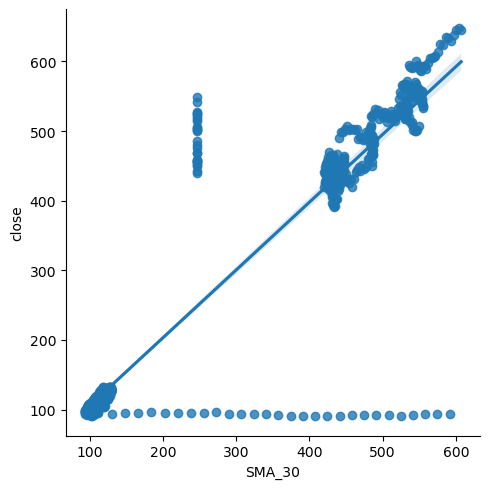

In [30]:
sns.lmplot(data= apple_df, x="open", y="close")
sns.lmplot(data= apple_df, x="low", y="close")
sns.lmplot(data= apple_df, x="high", y="close")
sns.lmplot(data= apple_df, x="SMA_30", y="close")

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import Ridge

In [32]:
predictors = ["low","SMA_30"]
target = "close"

Set random state value to an integer for testing/debugging purposes, so that our data is reproducible

Split data up to where 80% is used to train and 20% will be to test models accuracy.
- the prediction_train_data is df of just predictors list values after the split so it makes up 80% of the data
- the target_train_data is a df of  the close values for the matching 80% of the data split for the prediction_train_data

In [35]:
prediction_train_data, prediction_test_data, target_train_data, target_test_data = train_test_split(apple_df[predictors], apple_df["close"], test_size=0.2, random_state=42)

After looking at the graphs and correlation data I noticed mutlticollinearity between the columns I planned on using as predictors. Therefore, I decided to use a rigid regression.

Using GridSearchCV to find the most optimal alpha value that maximizes the models performance
Quick Explanation:
- Uses 5 fold method (based on cv value) where 1 alpha value will create the testdata of the rigid model and the remaing 4 alphas will make up the training data for the remaining alphas. This is repeated 4 more times with different alpha values as the test data each time 
- Ultimately this helps to reduce overfitting  by ensuring the model performs well across different subsets of the data.

In [38]:
ridge = Ridge()
alpha_values = {"alpha" : [0.01,0.1,1,10,100]}
grid_search = GridSearchCV(estimator=ridge,param_grid=alpha_values, cv=5)
grid_search.fit(prediction_train_data, target_train_data)
best_alpha = grid_search.best_params_["alpha"]

In [39]:
ridge_model = Ridge(alpha= best_alpha)
ridge_model.fit(prediction_train_data, target_train_data)

Ridge(alpha=100)

In [40]:
predictions = ridge_model.predict(prediction_test_data)

In [41]:
combined_test_df = prediction_test_data

In [42]:
combined_test_df["Predicted Closing Price"] = predictions

In [43]:
combined_test_df.sort_index(inplace= True)

In [44]:
combined_test_df["Actual Closing Price"] = target_test_data.sort_index()

In [45]:
combined_test_df

,low,SMA_30,Predicted Closing Price,Actual Closing Price
764,492.499977,246.371188,496.714650,506.089981
777,442.220001,246.371188,446.030667,457.840012
779,454.119980,246.371188,458.026264,468.220009
784,464.020020,484.700003,468.090670,466.590012
793,441.400009,463.924003,445.281510,441.400009
...,...,...,...,...
1721,111.230003,114.847000,112.334308,111.589996
1735,111.400002,112.921666,112.504987,111.800003
1736,110.330002,112.718000,111.426317,111.230003
1747,112.309998,110.535000,113.421446,113.949997


Train-Test split error calculations:

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
mse_val = mean_squared_error(combined_test_df["Actual Closing Price"], combined_test_df["Predicted Closing Price"])
mae_val = mean_absolute_error(combined_test_df["Actual Closing Price"], combined_test_df["Predicted Closing Price"])
r2_val = r2_score(combined_test_df["Actual Closing Price"], combined_test_df["Predicted Closing Price"])

In [49]:
print(f"Mean square error: {mse_val}\nMean absolute error: {mae_val}\nR squared score: {r2_val}")


Mean square error: 6.458194209291568
Mean absolute error: 1.5352756376297145
R squared score: 0.9998261587009226


Using K-fold cross validation error calculations to further see how well the model is performing: 
- The dataset is divided into k equal-sized parts
- The model is trained k times. Each time, a different fold is used as the test set while the remaining k-1 folds are used as the training data sets
- In this case I split the data into 5 folds

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(ridge, prediction_train_data, target_train_data, scoring = "neg_mean_squared_error", cv=kf)
mae_scores = cross_val_score(ridge, prediction_train_data, target_train_data, scoring = "neg_mean_absolute_error",cv=kf)
r2_scores = cross_val_score(ridge, prediction_train_data, target_train_data, scoring="r2", cv=kf)


In [52]:
print(f"Average mean squared error: {-mse_scores.mean()}")
print(f"Average mean absolute error: {-mae_scores.mean()}")
print(f"Average R squared score: {r2_scores.mean()}")

Average mean squared error: 5.031206826322907
Average mean absolute error: 1.4355159558655015
Average R squared score: 0.9998546152005051


In [93]:
!pip freeze


alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///Users/builder/miniconda3/envs/prefect/conda-bld/anaconda-client_1635406085191/work
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1637161053845/work
anyio @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/croot-t_zs64wy/anyio_1644482593257/work/dist
appdirs==1.4.4
appnope @ file:///Users/ktietz/demo/mc3/conda-bld/appnope_1629146036738/work
appscript @ file:///Users/ktietz/demo/mc3/conda-bld/appscript_1629302122760/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/croot-wbf5edig/argon2-cffi-bindings_1644845754377/work
astroid @ file:///Users/builder/miniconda3/envs/prefect/conda-bld/astroid_1639128690849/work
astropy @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_c616df68-df41-4866-a76d-40a7b3e7a5f1_yo6rltr/croots/recipe/astrop

In [95]:
!pip freeze > requirements.txt
